### PROJETO DE ANÁLISE DE DADOS: FATORES DE ANSIEDADE E DEPRESSÃO ###

# Importação biblioteca #

- Separei os imports  
    - Adicionei as instalações    
- Arrumei a identação
- Verifiquei que há colunas com NaN, mas é preciso entender como eles implicam no restante da tabela  
- Verifiquei a árvore de decisão  
    - Pode ser um bom modelo, mas precisamos verificar se não seria interessante adicionar mais um para comparação  
- Precisamos verificar:
    - O que queremos investigar  
    - Quais nossas hipóteses  
    - O que os dados nos contam  
- Depois, verificar se ML é interessante para esse caso  
    - Vamos ensinar o modelo a fazer o quê e por quê?  
    - O que a sociedade ganha com isso?  


In [ ]:
%pip install pandas 
%pip install matplotlib
%pip install seaborn
%pip install numpy

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [5]:


try:
    df = pd.read_csv('anxiety_depression_data.csv')
    print("Arquivo 'anxiety_depression_data.csv' carregado com sucesso.")
except FileNotFoundError:
    print("ERRO: Arquivo não encontrado.")
    df = pd.DataFrame()

if not df.empty:

    df['Substance_Use'] = np.where(df['Substance_Use'].str.contains('None', na=False), 'Non-user', df['Substance_Use'])
    print("Comando robusto para renomear 'None' para 'Non-user' foi executado.")

    category_order_substance = ['Non-user', 'Occasional', 'Frequent']
    print("Ordem das categorias definida.")

    print("\nDataFrame 'df' corrigido.")
else:
    print("\nA preparação falhou porque o arquivo não foi carregado.")

Arquivo 'anxiety_depression_data.csv' carregado com sucesso.
Comando robusto para renomear 'None' para 'Non-user' foi executado.
Ordem das categorias definida.

DataFrame 'df' corrigido.


In [6]:
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-darkgrid')

# Carregamento e inspeção dos dados #

In [12]:
if 'df' in locals() and not df.empty:
    print("\n--- 1.1 Visualizando as 5 primeiras linhas ---")
    display(df)

    print("\n" + "="*80 + "\n")

    print("--- 1.2 Informações Gerais do DataFrame (Tipos de Dados e Nulos) ---")
    print(df.info())

    print("\n" + "="*80 + "\n")
else:
    print("DataFrame 'df' não está definido ou está vazio.")


--- 1.1 Visualizando as 5 primeiras linhas ---


,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,0,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,0,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,0,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,1,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,0,0,NaN,1,1,Frequent,8,9,5,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,23,Female,Other,Student,5.1,0.1,7,16,15,5,1,0,Occasional,0,0,NaN,2,8,7,6,5
1196,43,Female,Master's,Employed,8.9,0.4,9,19,4,9,0,0,NaN,0,1,NaN,8,9,7,6,4
1197,71,Female,PhD,Retired,6.0,0.1,2,15,4,2,0,0,NaN,0,1,NaN,2,9,9,3,7
1198,21,Male,Other,Employed,8.5,2.7,8,12,20,2,1,1,NaN,0,0,NaN,8,5,1,3,7




--- 1.2 Informações Gerais do DataFrame (Tipos de Dados e Nulos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1200 non-null   int64  
 1   Gender                         1200 non-null   object 
 2   Education_Level                1200 non-null   object 
 3   Employment_Status              1200 non-null   object 
 4   Sleep_Hours                    1200 non-null   float64
 5   Physical_Activity_Hrs          1200 non-null   float64
 6   Social_Support_Score           1200 non-null   int64  
 7   Anxiety_Score                  1200 non-null   int64  
 8   Depression_Score               1200 non-null   int64  
 9   Stress_Level                   1200 non-null   int64  
 10  Family_History_Mental_Illness  1200 non-null   int64  
 11  Chronic_Illnesses              1200 n

In [10]:
print("Verificação de Dados Duplicados ---")
num_duplicates = df.duplicated().sum()
if num_duplicates == 0:
    print(f"Não há linhas duplicadas. (Total: {num_duplicates})")
else:
    print(f"⚠️ Encontradas {num_duplicates} linhas duplicadas. Recomenda-se remoção.")

Verificação de Dados Duplicados ---
Não há linhas duplicadas. (Total: 0)


In [11]:
print("\nVerificação de Valores Nulos ---")
null_counts = df.isnull().sum()
if null_counts.sum() == 0:
    print("✅ Não há valores nulos em nenhuma coluna.")
else:
    print("Foram encontrados valores nulos nas seguintes colunas:")
    print(null_counts[null_counts > 0])


Verificação de Valores Nulos ---
Foram encontrados valores nulos nas seguintes colunas:
Medication_Use    747
Substance_Use     834
dtype: int64


In [13]:
# Renomeando as colunas para português do Brasil

df.rename(columns={
    'Age': 'Idade',
    'Gender': 'Gênero',
    'Education_Level': 'Nível de Educação',
    'Employment_Status': 'Status de Emprego',
    'Sleep_Hours': 'Horas de Sono',
    'Physical_Activity_Hrs': 'Horas de Atividade Física',
    'Social_Support_Score': 'Pontuação de Apoio Social',
    'Anxiety_Score': 'Pontuação de Ansiedade',
    'Depression_Score': 'Pontuação de Depressão',
    'Stress_Level': 'Nível de Estresse',
    'Family_History_Mental_Illness': 'Histórico Familiar Doença Mental',
    'Chronic_Illnesses': 'Doenças Crônicas',
    'Medication_Use': 'Uso de Medicamentos',
    'Therapy': 'Terapia',
    'Meditation': 'Meditação',
    'Substance_Use': 'Uso de Substâncias',
    'Financial_Stress': 'Estresse Financeiro',
    'Work_Stress': 'Estresse no Trabalho',
    'Self_Esteem_Score': 'Pontuação de Autoestima',
    'Life_Satisfaction_Score': 'Pontuação de Satisfação com a Vida',
    'Loneliness_Score': 'Pontuação de Solidão'
}, inplace=True)

# Verificando se as colunas foram renomeadas corretamente
display(df.head())

,Idade,Gênero,Nível de Educação,Status de Emprego,Horas de Sono,Horas de Atividade Física,Pontuação de Apoio Social,Pontuação de Ansiedade,Pontuação de Depressão,Nível de Estresse,Histórico Familiar Doença Mental,Doenças Crônicas,Uso de Medicamentos,Terapia,Meditação,Uso de Substâncias,Estresse Financeiro,Estresse no Trabalho,Pontuação de Autoestima,Pontuação de Satisfação com a Vida,Pontuação de Solidão
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,0,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,0,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,0,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,1,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,0,0,NaN,1,1,Frequent,8,9,5,7,7


# ETL - Tratamento de Dados Nulos

In [48]:
#verificando se existe algum registro valido nas colunas Uso de Medicamentos e Uso de Substâncias

print("Verificando registros válidos nas colunas 'Uso de Medicamentos' e 'Uso de Substâncias':")

tem_med_validos = df['Uso de Medicamentos'].notna().any()
tem_subst_validos = df['Uso de Substâncias'].notna().any()

print(f"Há registros válidos em 'Uso de Medicamentos'? {'Sim' if tem_med_validos else 'Não'}")
print(f"Há registros válidos em 'Uso de Substâncias'? {'Sim' if tem_subst_validos else 'Não'}")

# Se quiser saber quantos registros válidos existem:
print(f"Total de registros válidos em 'Uso de Medicamentos': {df['Uso de Medicamentos'].notna().sum()}")
print(f"Total de registros válidos em 'Uso de Substâncias': {df['Uso de Substâncias'].notna().sum()}")
# ...existing code...


Verificando registros válidos nas colunas 'Uso de Medicamentos' e 'Uso de Substâncias':
Há registros válidos em 'Uso de Medicamentos'? Sim
Há registros válidos em 'Uso de Substâncias'? Sim
Total de registros válidos em 'Uso de Medicamentos': 453
Total de registros válidos em 'Uso de Substâncias': 366


In [51]:
#Printando exemplos validos nas colunas Uso de Medicamentos e Uso de Substâncias

print("\nExemplos de respostas preenchidas em 'Uso de Medicamentos' e 'Uso de Substancias':")
exemplos_medicamentos = df[df['Uso de Medicamentos'].notna()][['Uso de Medicamentos', 'Uso de Substâncias']].head(10)
print(exemplos_medicamentos)



Exemplos de respostas preenchidas em 'Uso de Medicamentos' e 'Uso de Substancias':
   Uso de Medicamentos Uso de Substâncias
5           Occasional         Occasional
8           Occasional         Occasional
10          Occasional         Occasional
11          Occasional           Frequent
12          Occasional                NaN
15             Regular           Frequent
16          Occasional                NaN
24          Occasional                NaN
26          Occasional                NaN
27          Occasional                NaN


#Melhor tratar como não informado. São colunas categoricas

# Análise de perfil e comportamento #

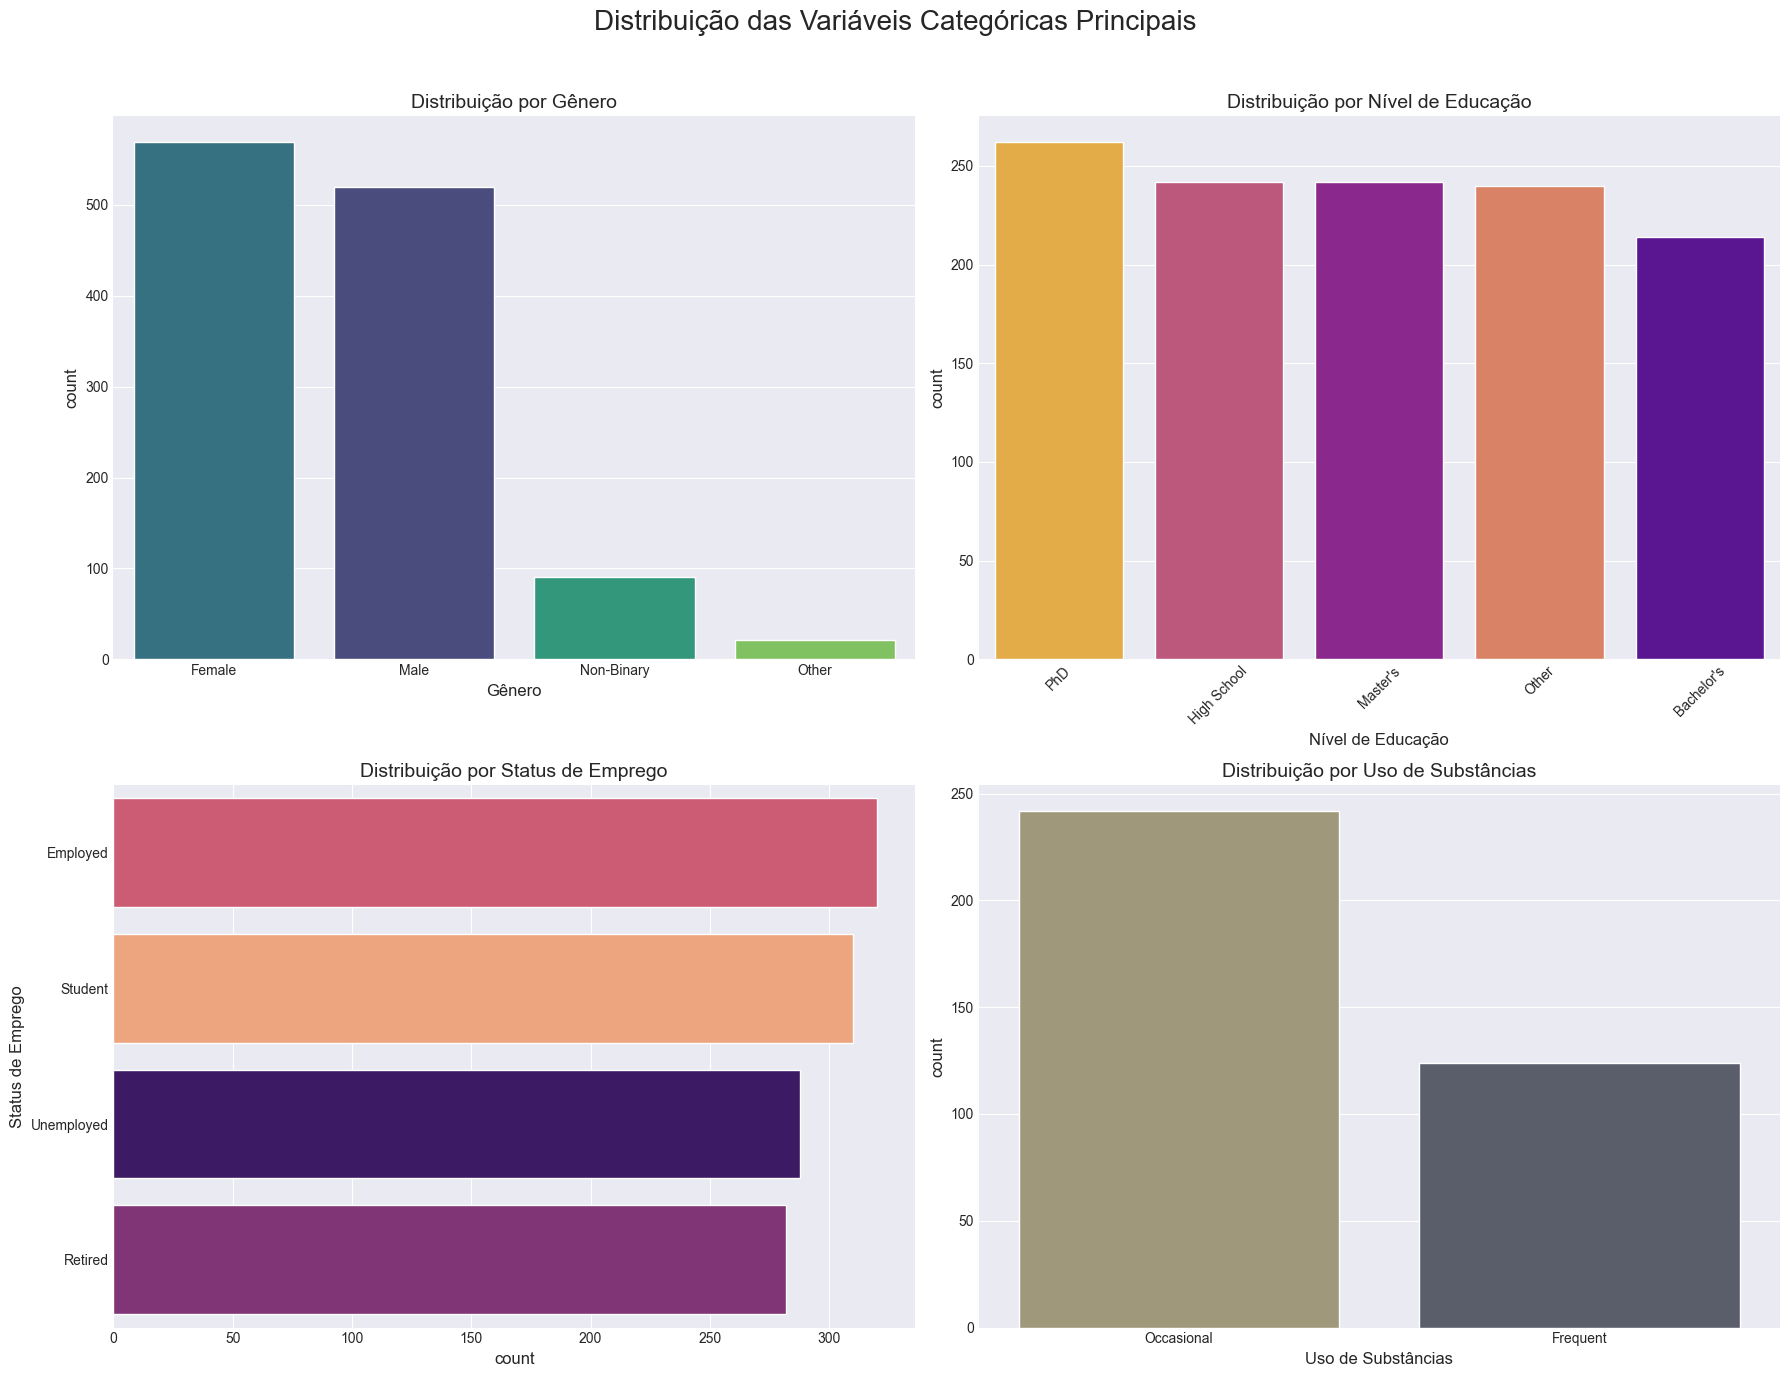

In [14]:
plot_configs = [
    {
        'column': 'Gênero',
        'title': 'Distribuição por Gênero',
        'palette': 'viridis',
        'orientation': 'vertical'
    },
    {
        'column': 'Nível de Educação',
        'title': 'Distribuição por Nível de Educação',
        'palette': 'plasma',
        'orientation': 'vertical',
        'rotate_labels': True 
    },
    {
        'column': 'Status de Emprego',
        'title': 'Distribuição por Status de Emprego',
        'palette': 'magma',
        'orientation': 'horizontal'
    },
    {
        'column': 'Uso de Substâncias',
        'title': 'Distribuição por Uso de Substâncias',
        'palette': 'cividis',
        'orientation': 'vertical'
    }
]

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Distribuição das Variáveis Categóricas Principais', fontsize=20)

axes_flat = axes.flatten()

for i, config in enumerate(plot_configs):
    ax = axes_flat[i]
    col = config['column']
    
    order = df[col].value_counts().index
    
    if config['orientation'] == 'vertical':
        sns.countplot(ax=ax, data=df, x=col, order=order, palette=config['palette'], 
                        hue=col, legend=False)
    else: 
        sns.countplot(ax=ax, data=df, y=col, order=order, palette=config['palette'],
                        hue=col, legend=False)
    
    ax.set_title(config['title'], fontsize=14)
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)
    
    
    if config.get('rotate_labels'):
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Análise de correlação entre fatores #


Gerando mapa de calor de correlação...


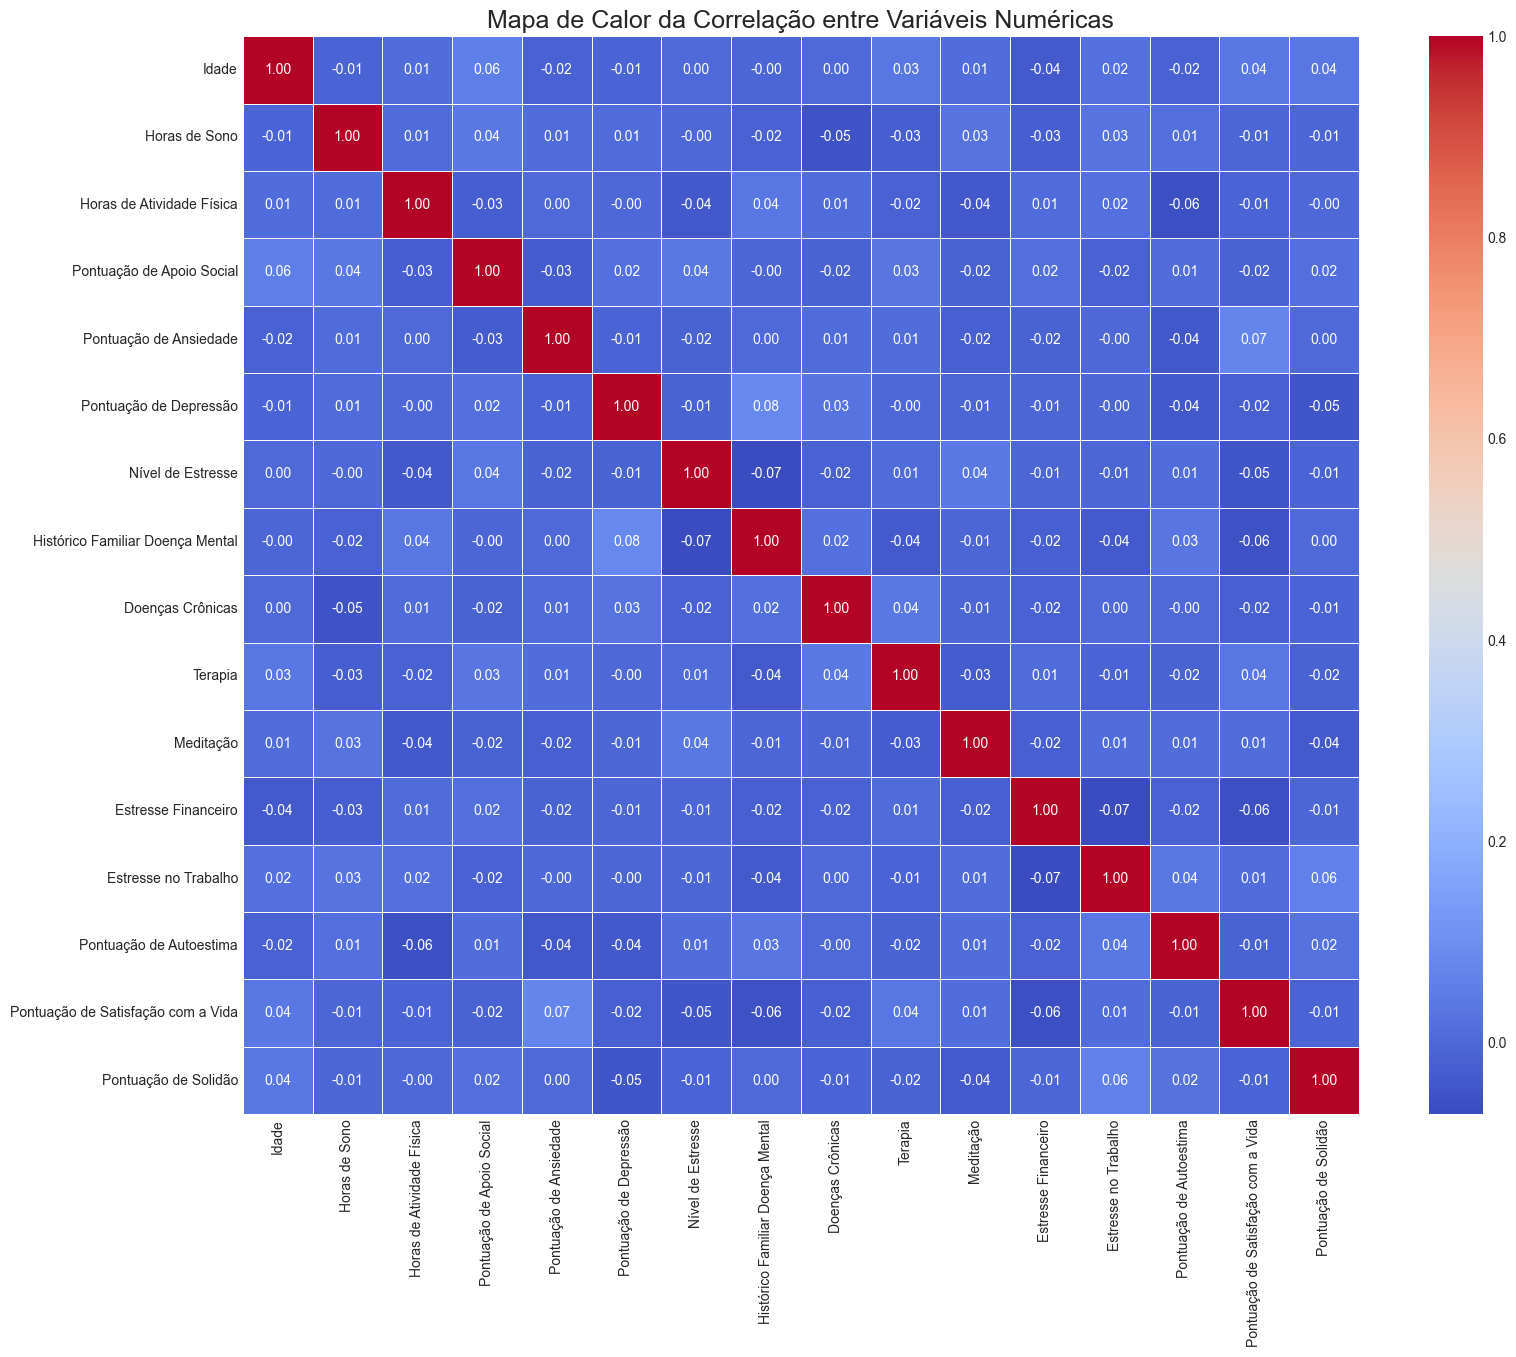

In [15]:
print("\nGerando mapa de calor de correlação...")
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5,
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title('Mapa de Calor da Correlação entre Variáveis Numéricas', fontsize=18)
plt.show()

# Análise de nível de educação vs estresse no trabalho #

Pontuação média de Estresse no Trabalho por Nível de Educação:
Nível de Educação
PhD            4.79
Other          4.88
Master's       4.88
High School    4.90
Bachelor's     5.02
Name: Estresse no Trabalho, dtype: float64


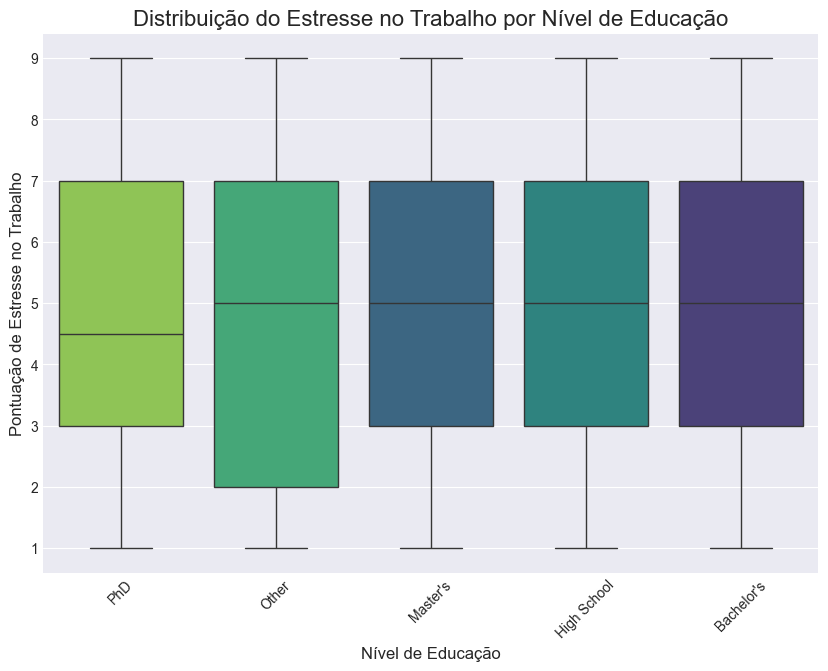

In [18]:
mean_stress_education = df.groupby('Nível de Educação')['Estresse no Trabalho'].mean().round(2).sort_values()
print("Pontuação média de Estresse no Trabalho por Nível de Educação:")
print(mean_stress_education)

plt.figure(figsize=(10, 7))
sns.boxplot(x='Nível de Educação', y='Estresse no Trabalho', data=df, order=mean_stress_education.index, 
            palette='viridis', hue='Nível de Educação', legend=False)
plt.title('Distribuição do Estresse no Trabalho por Nível de Educação', fontsize=16)
plt.xlabel('Nível de Educação', fontsize=12)
plt.ylabel('Pontuação de Estresse no Trabalho', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Apoio Social vs Solidão #


Apoio Social vs. Solidão -
Correlação entre Apoio Social e Solidão: 0.02


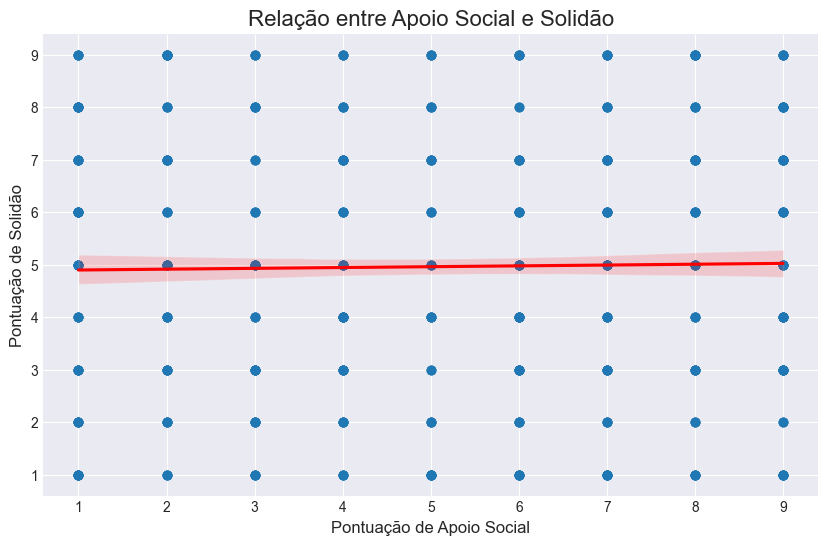

In [ ]:
print("\nApoio Social vs. Solidão -")

correlation_support_loneliness = df[['Pontuação de Apoio Social', 'Pontuação de Solidão']].corr().iloc[0, 1]
print(f"Correlação entre Apoio Social e Solidão: {correlation_support_loneliness:.2f}")

plt.figure(figsize=(10, 6))
sns.regplot(x='Pontuação de Apoio Social', y='Pontuação de Solidão', data=df, line_kws={"color": "red"}, scatter_kws={'alpha':0.5})
plt.title('Relação entre Apoio Social e Solidão', fontsize=16)
plt.xlabel('Pontuação de Apoio Social', fontsize=12)
plt.ylabel('Pontuação de Solidão', fontsize=12)
plt.show()

# Histórico Familiar vs Depressão #


Histórico Familiar de Doença Mental vs. Depressão
Pontuação média de Depressão por Histórico Familiar:
Family_History_Status
Com Histórico    11.34
Sem Histórico    10.36
Name: Depression_Score, dtype: float64


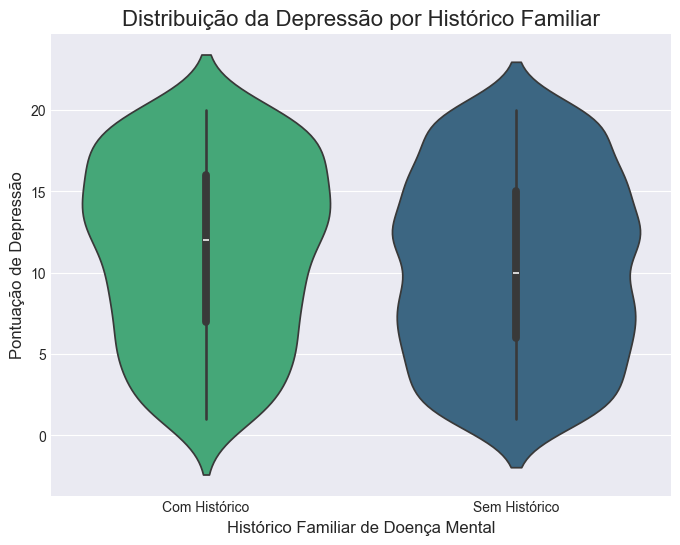

In [ ]:
print("\nHistórico Familiar de Doença Mental vs. Depressão")

df['Histórico_Familiar_Status'] = df['Histórico Familiar Doença Mental'].map({0: 'Sem Histórico', 1: 'Com Histórico'})

mean_depression_history = df.groupby('Histórico_Familiar_Status')['Pontuação de Depressão'].mean().round(2)
print("Pontuação média de Depressão por Histórico Familiar:")
print(mean_depression_history)

plt.figure(figsize=(8, 6))
sns.violinplot(
    x='Histórico_Familiar_Status',
    y='Pontuação de Depressão',
    data=df,
    order=['Com Histórico', 'Sem Histórico'],
    palette='viridis',
    hue='Histórico_Familiar_Status',
    legend=False
)
plt.title('Distribuição da Depressão por Histórico Familiar', fontsize=16)
plt.xlabel('Histórico Familiar de Doença Mental', fontsize=12)
plt.ylabel('Pontuação de Depressão', fontsize=12)
plt.show()

# Horas de Atividade Física vs Horas de Sono #


Horas de Atividade Física vs. Horas de Sono
Correlação entre Horas de Atividade Física e Horas de Sono: 0.01


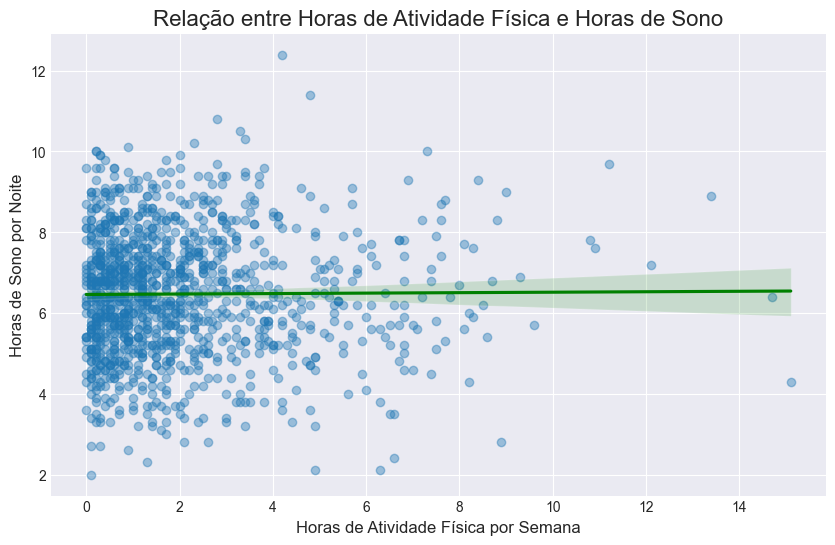

In [ ]:
print("\nHoras de Atividade Física vs. Horas de Sono")

correlation_activity_sleep = df[['Horas de Atividade Física', 'Horas de Sono']].corr().iloc[0, 1]
print(f"Correlação entre Horas de Atividade Física e Horas de Sono: {correlation_activity_sleep:.2f}")

plt.figure(figsize=(10, 6))
sns.regplot(x='Horas de Atividade Física', y='Horas de Sono', data=df, line_kws={"color": "green"}, scatter_kws={'alpha':0.4})
plt.title('Relação entre Horas de Atividade Física e Horas de Sono', fontsize=16)
plt.xlabel('Horas de Atividade Física por Semana', fontsize=12)
plt.ylabel('Horas de Sono por Noite', fontsize=12)
plt.show()

# Uso de Substâncias vs Depressão e Ansiedade #

Uso de Substâncias vs. Depressão e Ansiedade 
Pontuação média de Depressão por Uso de Substâncias:
Uso de Substâncias
Non-user        NaN
Occasional    10.31
Frequent      11.51
Name: Pontuação de Depressão, dtype: float64

Pontuação média de Ansiedade por Uso de Substâncias:
Uso de Substâncias
Non-user        NaN
Occasional    10.74
Frequent       9.85
Name: Pontuação de Ansiedade, dtype: float64


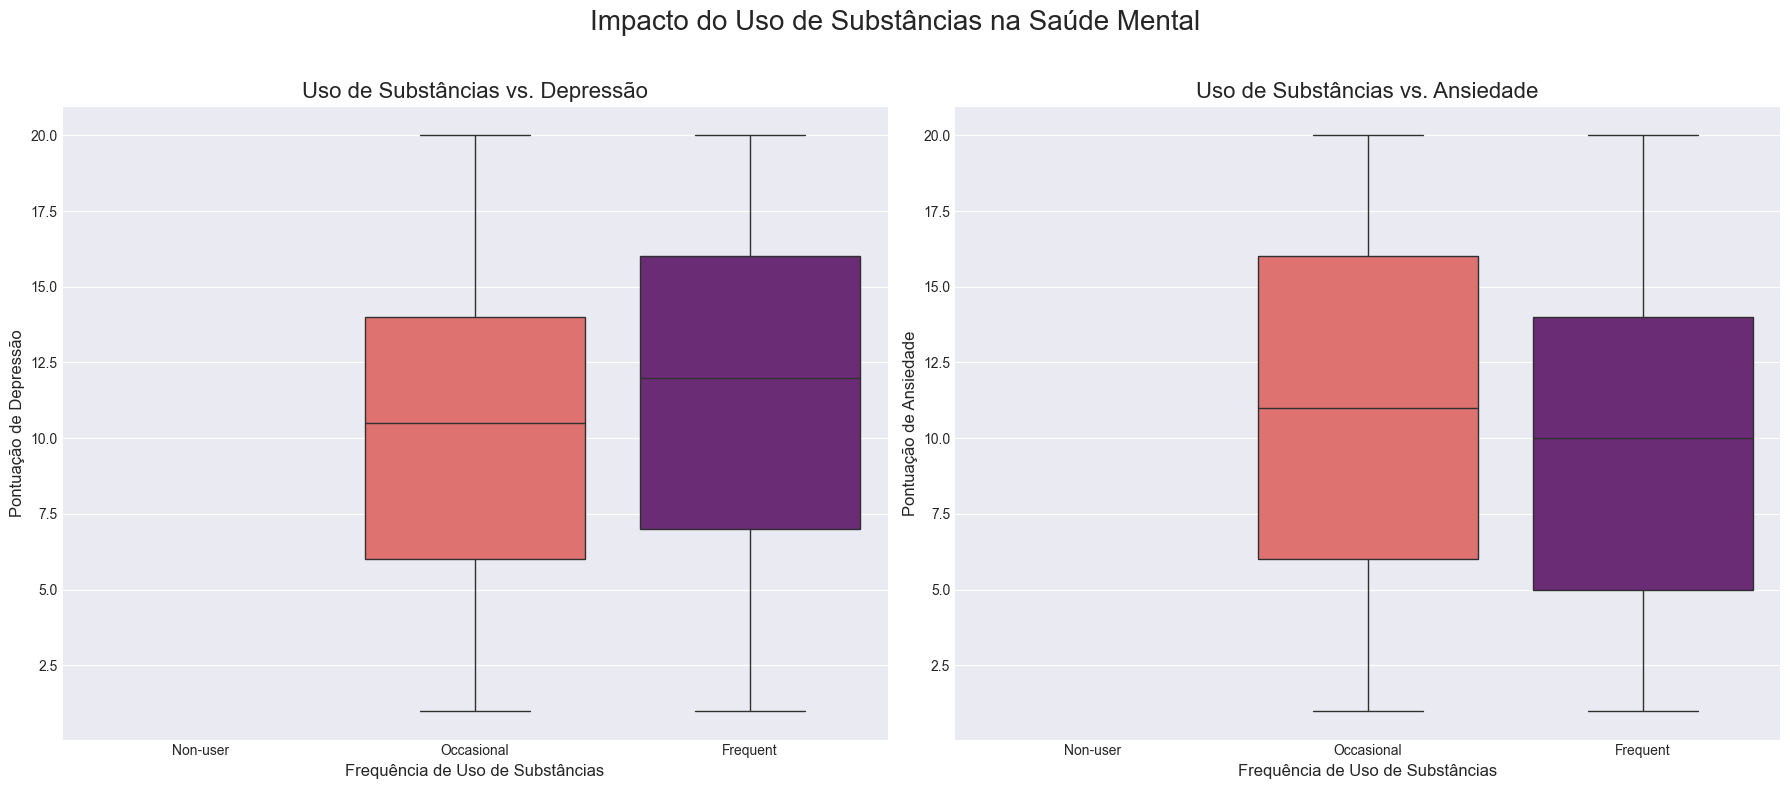

In [19]:
print("Uso de Substâncias vs. Depressão e Ansiedade ")

# Ordem das categorias já em português
category_order = category_order_substance

mean_depression_substance = df.groupby('Uso de Substâncias')['Pontuação de Depressão'].mean().round(2).reindex(category_order)
mean_anxiety_substance = df.groupby('Uso de Substâncias')['Pontuação de Ansiedade'].mean().round(2).reindex(category_order)

print("Pontuação média de Depressão por Uso de Substâncias:")
print(mean_depression_substance)
print("\nPontuação média de Ansiedade por Uso de Substâncias:")
print(mean_anxiety_substance)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Impacto do Uso de Substâncias na Saúde Mental', fontsize=20)
sns.boxplot(ax=axes[0], x='Uso de Substâncias', y='Pontuação de Depressão', data=df, order=category_order,
            palette='magma', hue='Uso de Substâncias', legend=False)
axes[0].set_title('Uso de Substâncias vs. Depressão', fontsize=16)
axes[0].set_xlabel('Frequência de Uso de Substâncias', fontsize=12)
axes[0].set_ylabel('Pontuação de Depressão', fontsize=12)

sns.boxplot(ax=axes[1], x='Uso de Substâncias', y='Pontuação de Ansiedade', data=df, order=category_order,
            palette='magma', hue='Uso de Substâncias', legend=False)
axes[1].set_title('Uso de Substâncias vs. Ansiedade', fontsize=16)
axes[1].set_xlabel('Frequência de Uso de Substâncias', fontsize=12)
axes[1].set_ylabel('Pontuação de Ansiedade', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Interação entre Estresse no Trabalho e Gênero #

Interação entre Estresse no Trabalho e Gênero


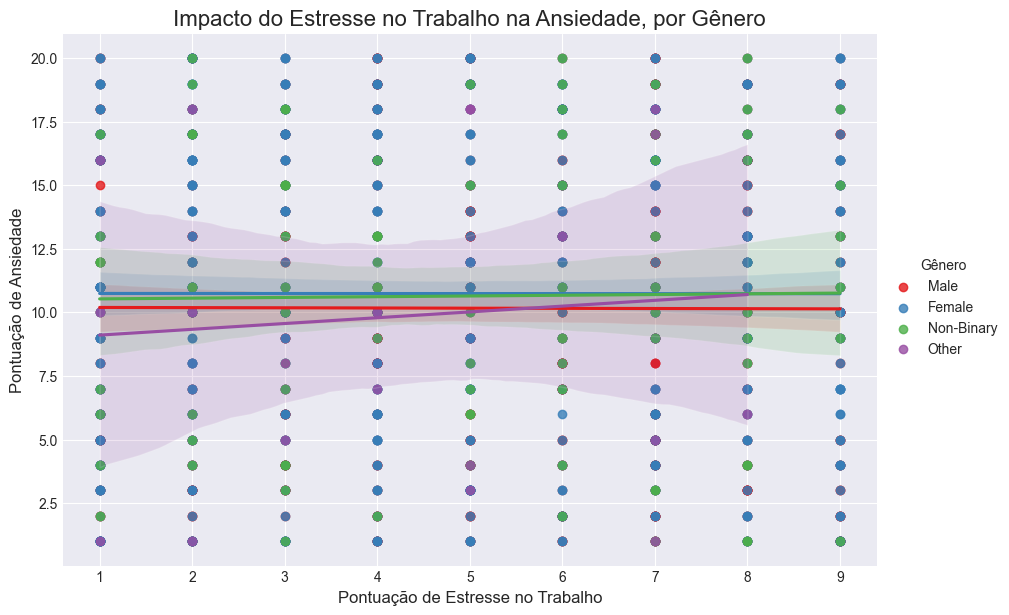

In [20]:
print("Interação entre Estresse no Trabalho e Gênero")

sns.lmplot(x='Estresse no Trabalho', y='Pontuação de Ansiedade', hue='Gênero', data=df,
           palette='Set1', height=6, aspect=1.5)
plt.title('Impacto do Estresse no Trabalho na Ansiedade, por Gênero', fontsize=16)
plt.xlabel('Pontuação de Estresse no Trabalho', fontsize=12)
plt.ylabel('Pontuação de Ansiedade', fontsize=12)
plt.show()

# Criação e Análise de um "Perfil de Risco" #


Perfil de Risco vs. Status de Emprego
Pontuação Média do Perfil de Risco por Status de Emprego:
Status de Emprego
Unemployed    26.26
Retired       26.23
Student       26.04
Employed      25.91
Name: Pontuação de Risco, dtype: float64


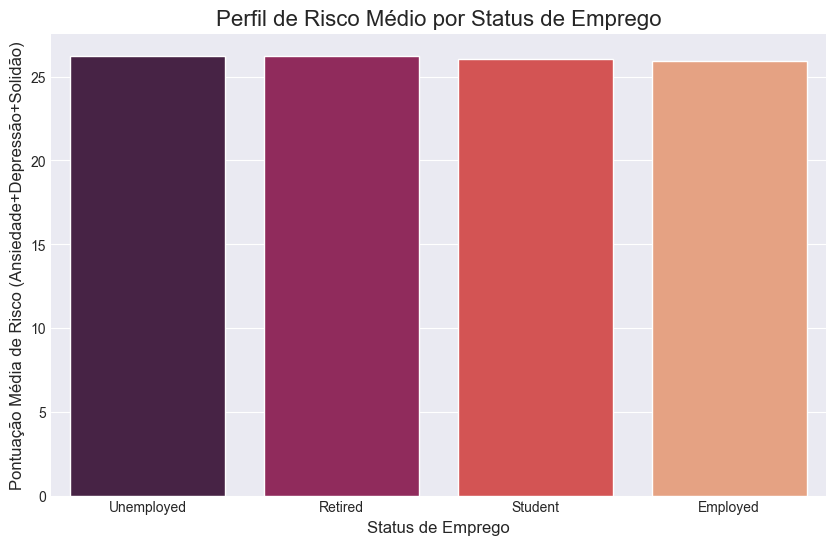

In [21]:
print("\nPerfil de Risco vs. Status de Emprego")

df['Pontuação de Risco'] = df['Pontuação de Ansiedade'] + df['Pontuação de Depressão'] + df['Pontuação de Solidão']

mean_risk_employment = df.groupby('Status de Emprego')['Pontuação de Risco'].mean().round(2).sort_values(ascending=False)
print("Pontuação Média do Perfil de Risco por Status de Emprego:")
print(mean_risk_employment)

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_risk_employment.index, y=mean_risk_employment.values,
            palette='rocket', hue=mean_risk_employment.index, legend=False)
plt.title('Perfil de Risco Médio por Status de Emprego', fontsize=16)
plt.xlabel('Status de Emprego', fontsize=12)
plt.ylabel('Pontuação Média de Risco (Ansiedade+Depressão+Solidão)', fontsize=12)
plt.show()

# Análises de Subgrupos - Terapia e Histórico Familiar #


Efetividade da Terapia em Subgrupos


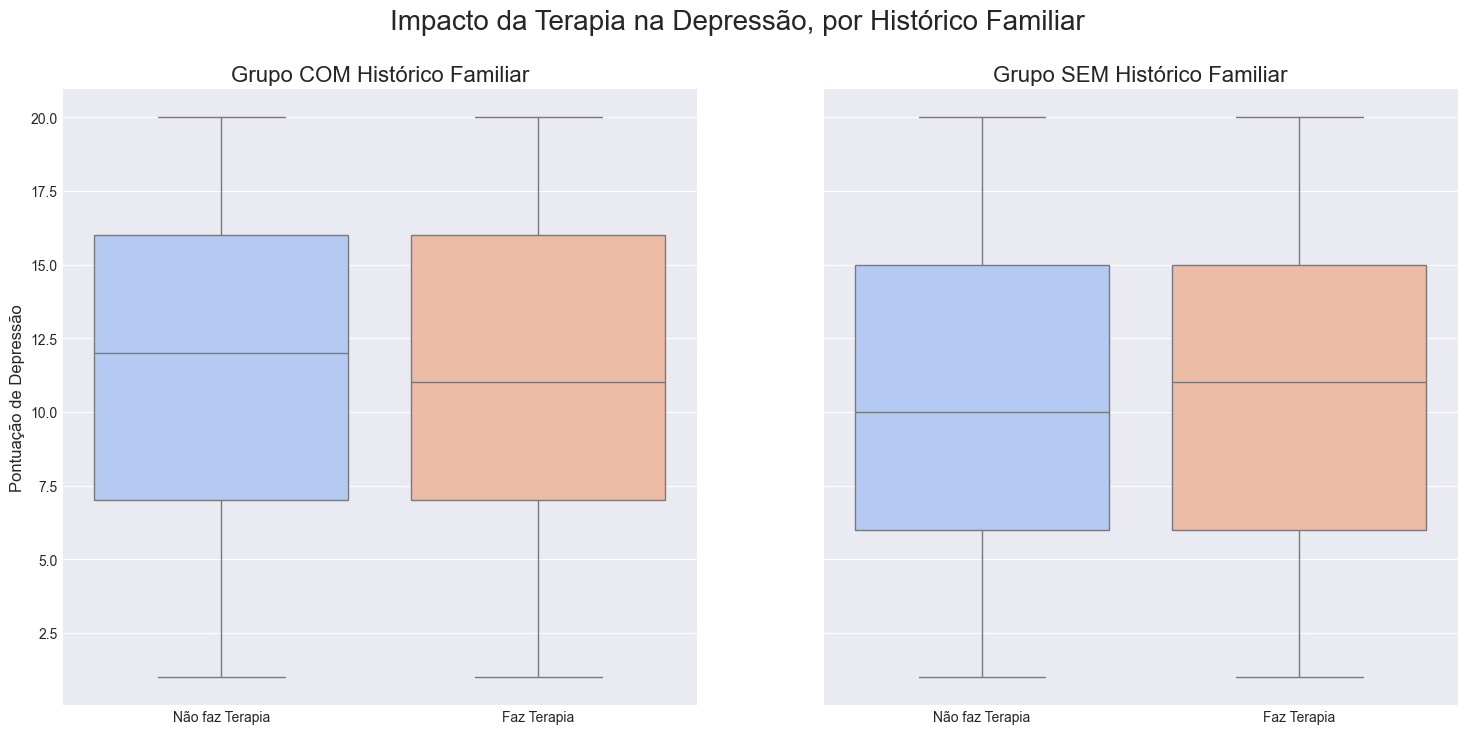

In [ ]:
print("\nEfetividade da Terapia em Subgrupos")

df['Histórico_Familiar_Status'] = df['Histórico Familiar Doença Mental'].map({0: 'Sem Histórico', 1: 'Com Histórico'})
df['Terapia_Status'] = df['Terapia'].map({0: 'Não faz Terapia', 1: 'Faz Terapia'})

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True) 
fig.suptitle('Impacto da Terapia na Depressão, por Histórico Familiar', fontsize=20)

sns.boxplot(ax=axes[0], x='Terapia_Status', y='Pontuação de Depressão', data=df[df['Histórico_Familiar_Status'] == 'Com Histórico'],
            palette='coolwarm', hue='Terapia_Status', legend=False)
axes[0].set_title('Grupo COM Histórico Familiar', fontsize=16)
axes[0].set_xlabel('')
axes[0].set_ylabel('Pontuação de Depressão', fontsize=12)

sns.boxplot(ax=axes[1], x='Terapia_Status', y='Pontuação de Depressão', data=df[df['Histórico_Familiar_Status'] == 'Sem Histórico'],
            palette='coolwarm', hue='Terapia_Status', legend=False)
axes[1].set_title('Grupo SEM Histórico Familiar', fontsize=16)
axes[1].set_xlabel('')
axes[1].set_ylabel('') 
plt.show()

# Índice de Hábitos Saudáveis vs. Satisfação com a Vida #


Índice de Hábitos Saudáveis vs. Satisfação com a Vida
Correlação entre Índice de Hábitos Saudáveis e Satisfação com a Vida: -0.01


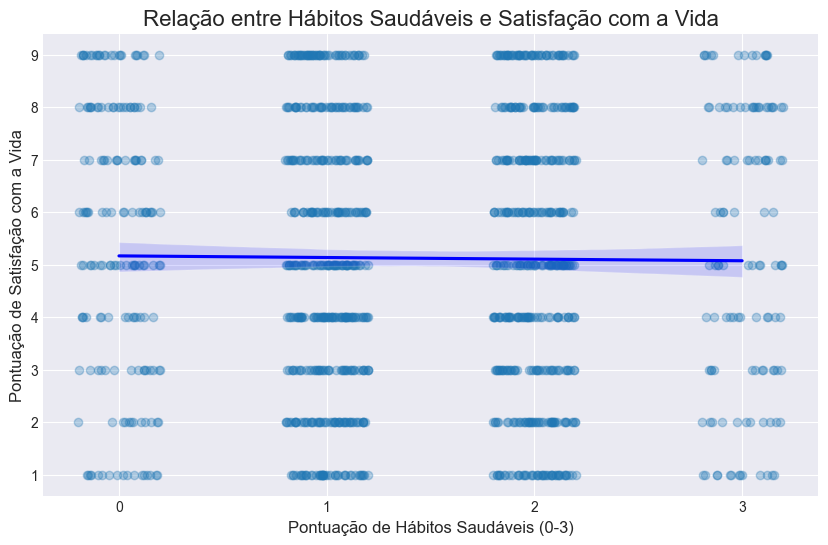

In [22]:
print("\nÍndice de Hábitos Saudáveis vs. Satisfação com a Vida")

sleep_threshold = df['Horas de Sono'].median()
activity_threshold = df['Horas de Atividade Física'].median()

df['Índice de Hábitos Saudáveis'] = (
    (df['Horas de Sono'] >= sleep_threshold).astype(int) +
    (df['Horas de Atividade Física'] >= activity_threshold).astype(int) +
    df['Meditação']
)

correlation_habits_satisfaction = df[['Índice de Hábitos Saudáveis', 'Pontuação de Satisfação com a Vida']].corr().iloc[0, 1]
print(f"Correlação entre Índice de Hábitos Saudáveis e Satisfação com a Vida: {correlation_habits_satisfaction:.2f}")

plt.figure(figsize=(10, 6))
sns.regplot(x='Índice de Hábitos Saudáveis', y='Pontuação de Satisfação com a Vida', data=df, 
            x_jitter=0.2, 
            line_kws={"color": "blue"}, scatter_kws={'alpha':0.3})
plt.title('Relação entre Hábitos Saudáveis e Satisfação com a Vida', fontsize=16)
plt.xlabel('Pontuação de Hábitos Saudáveis (0-3)', fontsize=12)
plt.ylabel('Pontuação de Satisfação com a Vida', fontsize=12)
plt.xticks([0, 1, 2, 3])
plt.show()

### Análises mais avançadas (machine learning) ###

# Importações para Machine Learning #

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [24]:
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-darkgrid')

# Modelo Preditivo (Arvóre de Decisão) #

Acurácia do Modelo de Árvore de Decisão: 70.83%


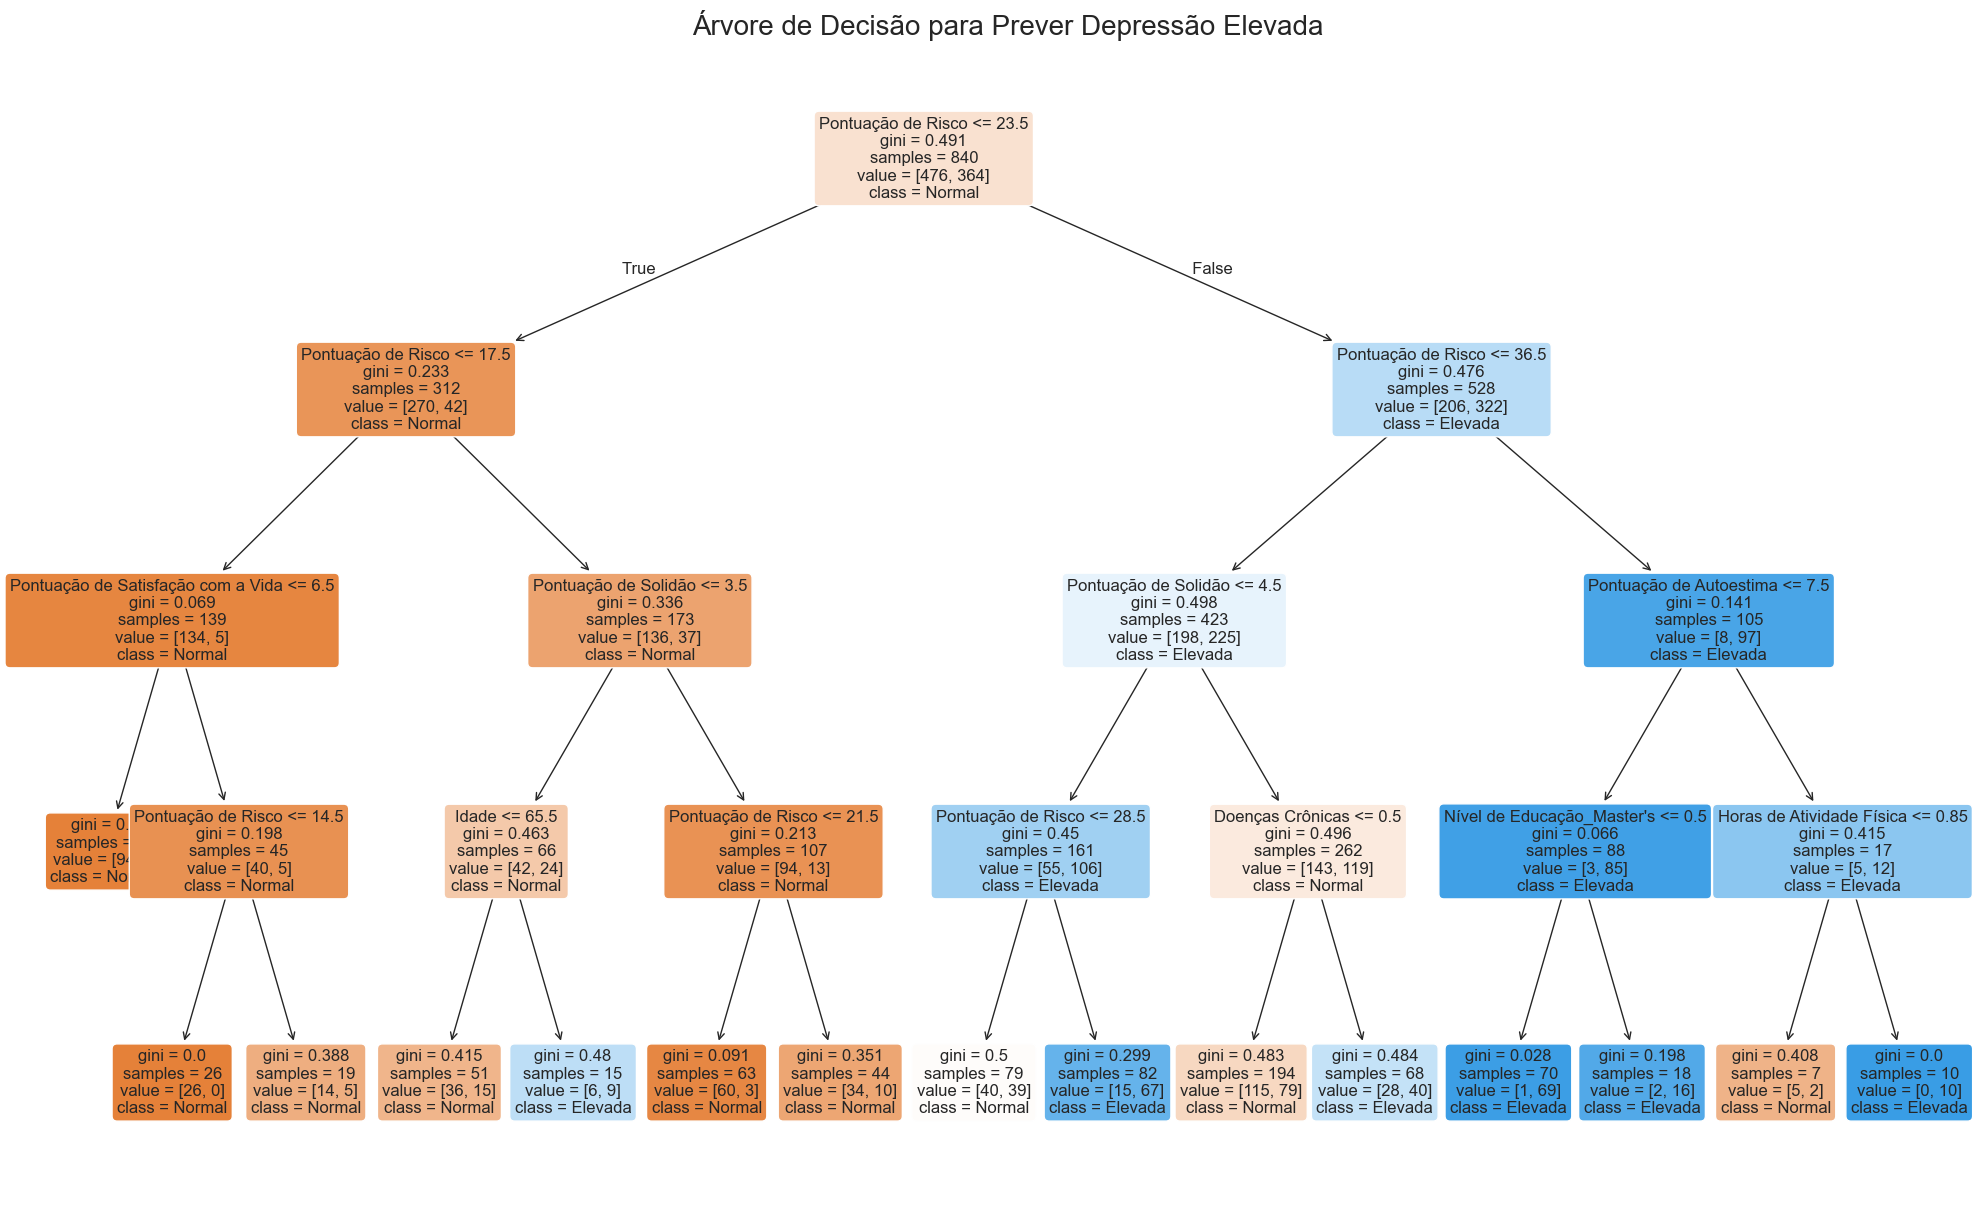

In [25]:
df['Depressao_Elevada'] = (df['Pontuação de Depressão'] > 12).astype(int)
features = df.drop(['Pontuação de Depressão', 'Depressao_Elevada', 'Pontuação de Ansiedade', 'Nível de Estresse'], axis=1)
features_encoded = pd.get_dummies(features, drop_first=True)
target = df['Depressao_Elevada']
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.3, random_state=42)

tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do Modelo de Árvore de Decisão: {accuracy:.2%}")

plt.figure(figsize=(25, 15))
plot_tree(tree_model, feature_names=features_encoded.columns, class_names=['Normal', 'Elevada'], filled=True, rounded=True, fontsize=12)
plt.title("Árvore de Decisão para Prever Depressão Elevada", fontsize=20)
plt.show()

In [26]:
from sklearn.tree import export_text

# Análise da Árvore de Decisão #

In [31]:
df['Depressao_Elevada'] = (df['Pontuação de Depressão'] > 12).astype(int)
features = df.drop(['Pontuação de Depressão', 'Depressao_Elevada', 'Pontuação de Ansiedade', 'Nível de Estresse'], axis=1)
features = features.drop(['Cluster', 'Histórico_Familiar_Status', 'Terapia_Status', 'Estresse_Financeiro_Alto', 'Índice de Hábitos Saudáveis', 'Meditação_Status'], axis=1, errors='ignore')

features_encoded = pd.get_dummies(features, drop_first=True)
target = df['Depressao_Elevada']
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.3, random_state=42)

tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

feature_names = list(features_encoded.columns)
tree_rules = export_text(tree_model, feature_names=feature_names)

print(f"\nRegras da Árvore de Decisão (lê-se de cima para baixo):")
print("="*60)
print(tree_rules)
print("="*60)

y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do Modelo: {accuracy:.2%}")

print("\nAnálise da Árvore de Decisão em formato de texto concluída.")


Regras da Árvore de Decisão (lê-se de cima para baixo):
|--- Pontuação de Risco <= 23.50
|   |--- Pontuação de Risco <= 17.50
|   |   |--- Pontuação de Satisfação com a Vida <= 6.50
|   |   |   |--- class: 0
|   |   |--- Pontuação de Satisfação com a Vida >  6.50
|   |   |   |--- Pontuação de Risco <= 14.50
|   |   |   |   |--- class: 0
|   |   |   |--- Pontuação de Risco >  14.50
|   |   |   |   |--- class: 0
|   |--- Pontuação de Risco >  17.50
|   |   |--- Pontuação de Solidão <= 3.50
|   |   |   |--- Idade <= 65.50
|   |   |   |   |--- class: 0
|   |   |   |--- Idade >  65.50
|   |   |   |   |--- class: 1
|   |   |--- Pontuação de Solidão >  3.50
|   |   |   |--- Pontuação de Risco <= 21.50
|   |   |   |   |--- class: 0
|   |   |   |--- Pontuação de Risco >  21.50
|   |   |   |   |--- class: 0
|--- Pontuação de Risco >  23.50
|   |--- Pontuação de Risco <= 36.50
|   |   |--- Pontuação de Solidão <= 4.50
|   |   |   |--- Pontuação de Risco <= 28.50
|   |   |   |   |--- class: 0
|  

# Análise de Cluster #


16. Análise de Cluster: Encontrando Perfis de Saúde Mental


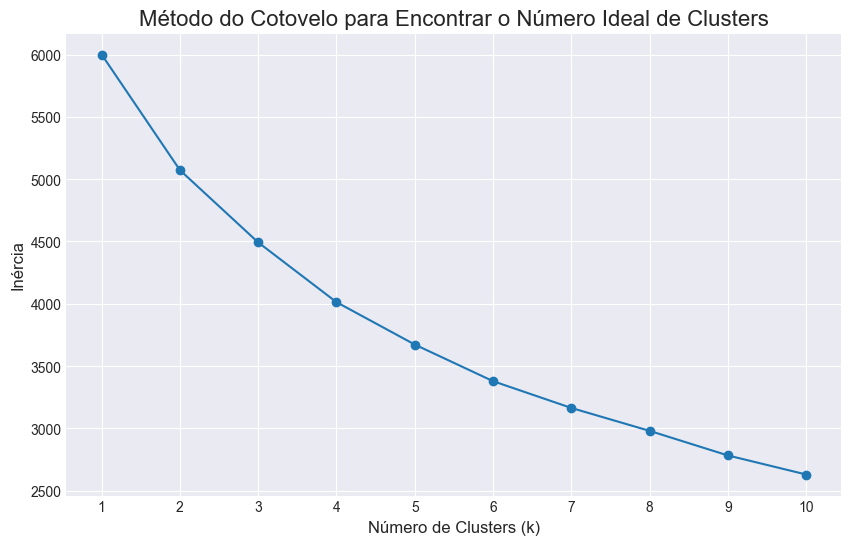

In [42]:
print("\n16. Análise de Cluster: Encontrando Perfis de Saúde Mental")

variaveis_cluster = df[['Pontuação de Ansiedade', 'Pontuação de Depressão', 'Nível de Estresse', 'Pontuação de Solidão', 'Pontuação de Satisfação com a Vida']]
escalonador = StandardScaler()
variaveis_escalonadas = escalonador.fit_transform(variaveis_cluster)

inercias = []
faixa_k = range(1, 11)
for k in faixa_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(variaveis_escalonadas)
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(faixa_k, inercias, marker='o')
plt.title('Método do Cotovelo para Encontrar o Número Ideal de Clusters', fontsize=16)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Inércia', fontsize=12)
plt.xticks(faixa_k)
plt.show()



Análise dos 3 Perfis (Clusters) Encontrados:
         Pontuação de Ansiedade  Pontuação de Depressão  Pontuação de Solidão  \
Cluster                                                                         
0                         11.96                   10.95                  2.84   
1                         12.07                    9.84                  7.48   
2                          6.97                   11.30                  4.52   

         Pontuação de Satisfação com a Vida  
Cluster                                      
0                                      6.68  
1                                      5.41  
2                                      3.02  


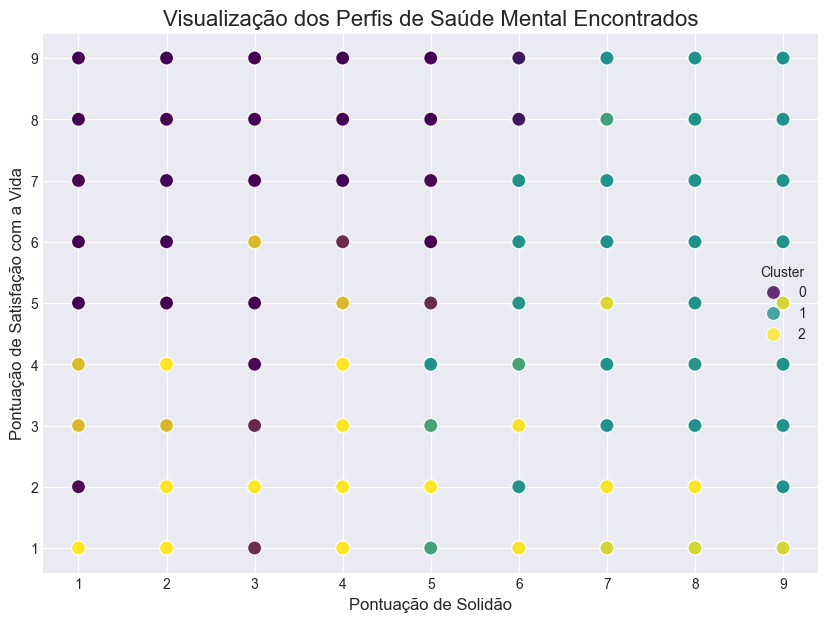

In [33]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(variaveis_escalonadas)
cluster_analysis = df.groupby('Cluster')[['Pontuação de Ansiedade', 'Pontuação de Depressão', 'Pontuação de Solidão', 'Pontuação de Satisfação com a Vida']].mean().round(2)
print(f"\nAnálise dos {k} Perfis (Clusters) Encontrados:")
print(cluster_analysis)

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Pontuação de Solidão', y='Pontuação de Satisfação com a Vida', hue='Cluster', palette='viridis', s=100, alpha=0.8)
plt.title('Visualização dos Perfis de Saúde Mental Encontrados', fontsize=16)
plt.xlabel('Pontuação de Solidão', fontsize=12)
plt.ylabel('Pontuação de Satisfação com a Vida', fontsize=12)
plt.show()

# Análise de Interação de Estressores #

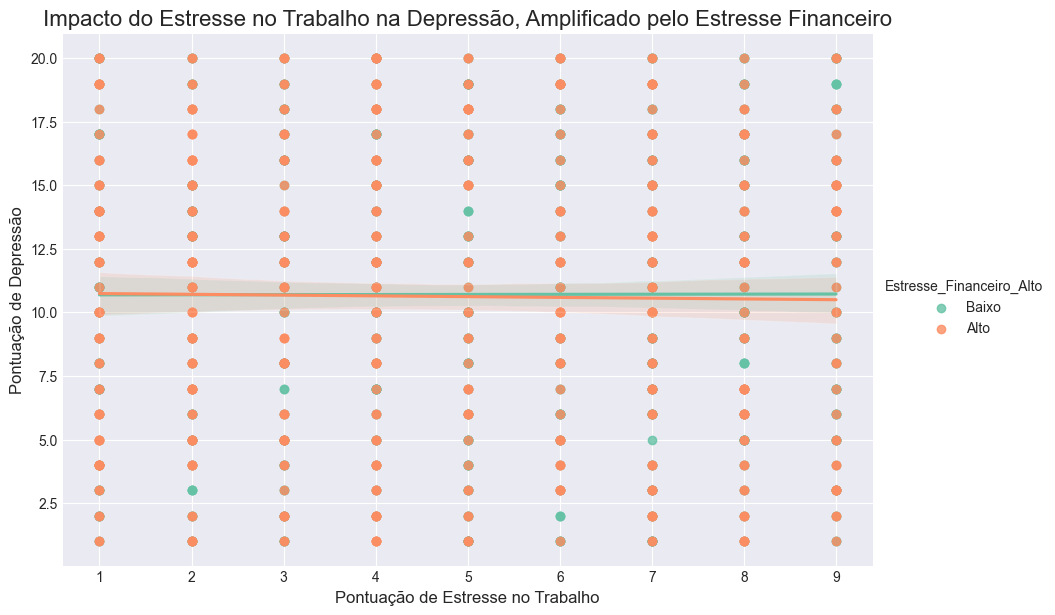

In [34]:
df['Estresse_Financeiro_Alto'] = (df['Estresse Financeiro'] > df['Estresse Financeiro'].median()).map({True: 'Alto', False: 'Baixo'})

sns.lmplot(x='Estresse no Trabalho', y='Pontuação de Depressão', hue='Estresse_Financeiro_Alto', data=df,
           palette='Set2', height=6, aspect=1.5)
plt.title('Impacto do Estresse no Trabalho na Depressão, Amplificado pelo Estresse Financeiro', fontsize=16)
plt.xlabel('Pontuação de Estresse no Trabalho', fontsize=12)
plt.ylabel('Pontuação de Depressão', fontsize=12)
plt.show()


# Análise de Mediação: O Caminho do Apoio Social para a Satisfação #


O Caminho do Apoio Social para a Satisfação
Passo 1 (A->C): Correlação Apoio Social -> Satisfação com a Vida: -0.02
Passo 2 (A->B): Correlação Apoio Social -> Solidão: 0.02
Passo 3 (B->C): Correlação Solidão -> Satisfação com a Vida: -0.01


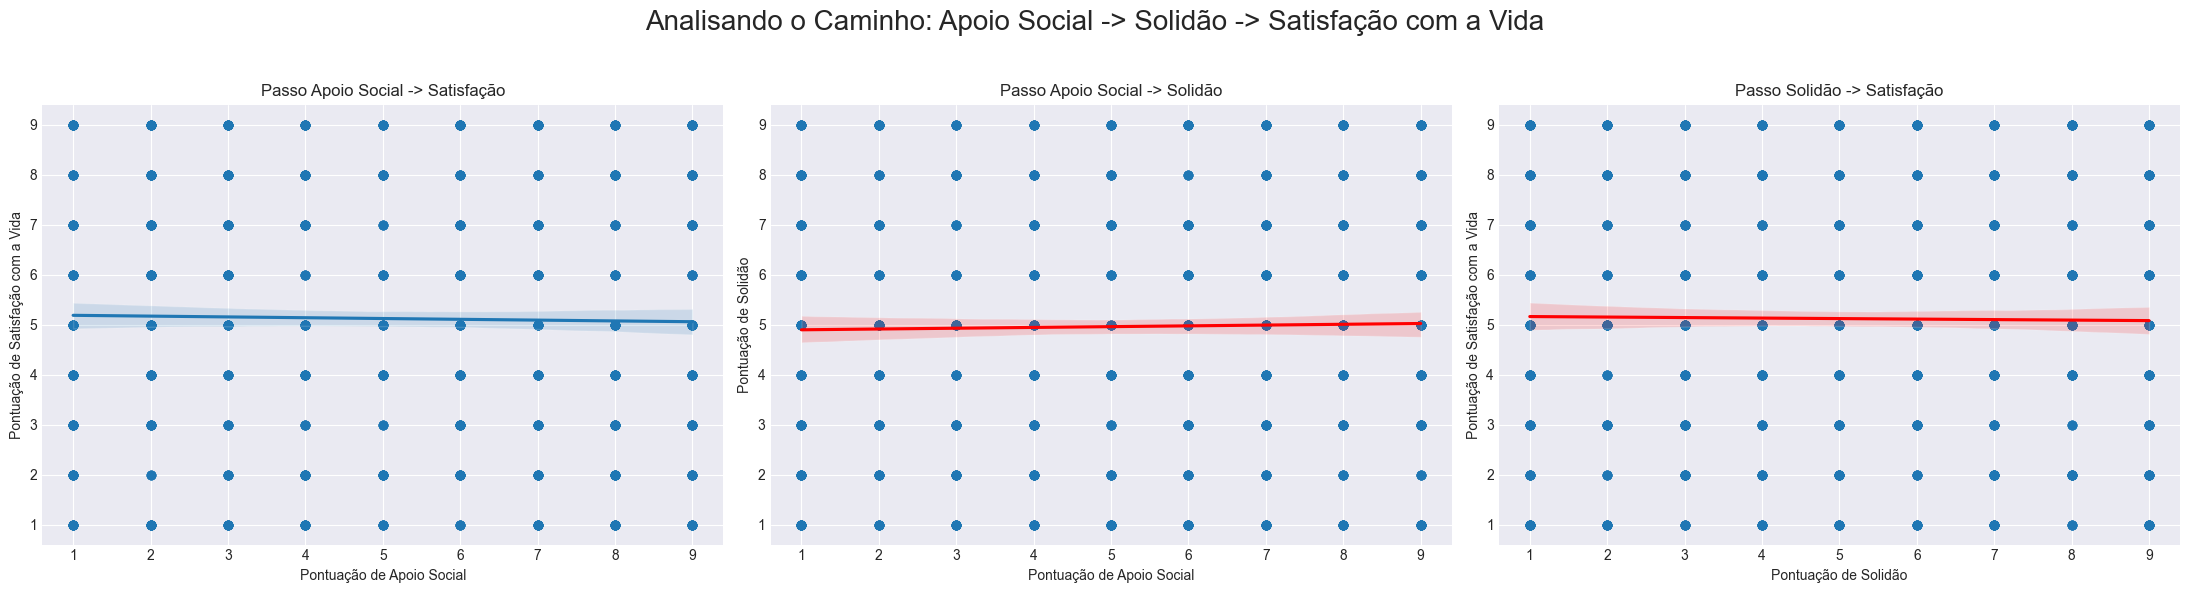

In [35]:
print("\nO Caminho do Apoio Social para a Satisfação")

corr_A_C = df[['Pontuação de Apoio Social', 'Pontuação de Satisfação com a Vida']].corr().iloc[0, 1]
corr_A_B = df[['Pontuação de Apoio Social', 'Pontuação de Solidão']].corr().iloc[0, 1]
corr_B_C = df[['Pontuação de Solidão', 'Pontuação de Satisfação com a Vida']].corr().iloc[0, 1]

print(f"Passo 1 (A->C): Correlação Apoio Social -> Satisfação com a Vida: {corr_A_C:.2f}")
print(f"Passo 2 (A->B): Correlação Apoio Social -> Solidão: {corr_A_B:.2f}")
print(f"Passo 3 (B->C): Correlação Solidão -> Satisfação com a Vida: {corr_B_C:.2f}")

fig, axes = plt.subplots(1, 3, figsize=(22, 6))
fig.suptitle('Analisando o Caminho: Apoio Social -> Solidão -> Satisfação com a Vida', fontsize=20)
sns.regplot(ax=axes[0], data=df, x='Pontuação de Apoio Social', y='Pontuação de Satisfação com a Vida').set_title('Passo Apoio Social -> Satisfação')
sns.regplot(ax=axes[1], data=df, x='Pontuação de Apoio Social', y='Pontuação de Solidão', line_kws={'color':'red'}).set_title('Passo Apoio Social -> Solidão')
sns.regplot(ax=axes[2], data=df, x='Pontuação de Solidão', y='Pontuação de Satisfação com a Vida', line_kws={'color':'red'}).set_title('Passo Solidão -> Satisfação')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Análises focadas em Uso de Substâncias #

# Uso de Substâncias vs Horas de Sono #

Análise: Uso de Substâncias vs. Horas de Sono
Média de Horas de Sono por Uso de Substâncias:
Substance_Use
None           NaN
Occasional    6.55
Frequent      6.53
Name: Sleep_Hours, dtype: float64


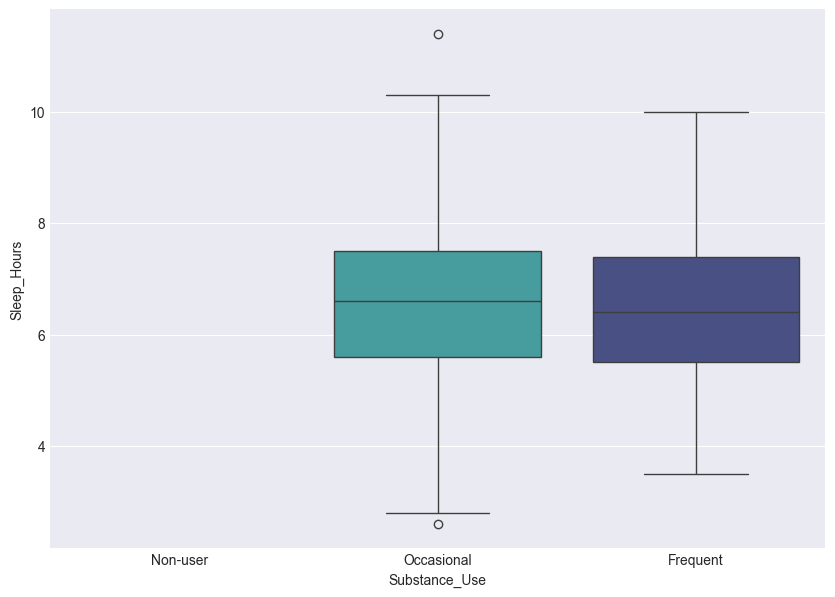

In [ ]:
print("Análise: Uso de Substâncias vs. Horas de Sono")

mean_sleep_substance = df.groupby('Uso de Substâncias')['Horas de Sono'].mean().round(2).reindex(category_order_substance)
print("Média de Horas de Sono por Uso de Substâncias:")
print(mean_sleep_substance)

plt.figure(figsize=(10, 7))
sns.boxplot(x='Uso de Substâncias', y='Horas de Sono', data=df, order=category_order_substance,
        palette='mako', hue='Uso de Substâncias', legend=False)
plt.show()

# Uso de Substâncias vs Tipos de Estresse #


Análise: Uso de Substâncias vs. Tipos de Estresse


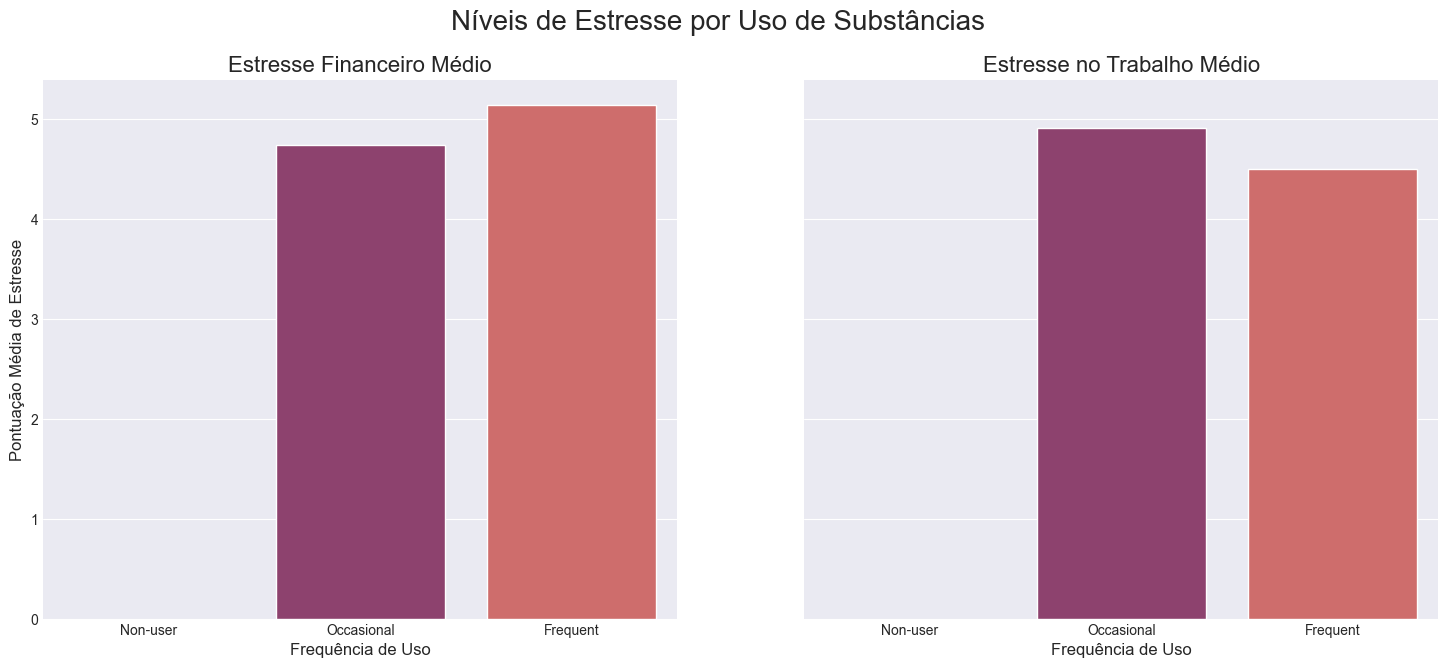

In [36]:
print("\nAnálise: Uso de Substâncias vs. Tipos de Estresse")

fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)
fig.suptitle('Níveis de Estresse por Uso de Substâncias', fontsize=20)

# Gráfico 1: Estresse Financeiro
sns.barplot(
    ax=axes[0],
    x='Uso de Substâncias',
    y='Estresse Financeiro',
    data=df,
    order=category_order_substance,
    palette='flare',
    hue='Uso de Substâncias',
    legend=False,
    errorbar=None
)
axes[0].set_title('Estresse Financeiro Médio', fontsize=16)
axes[0].set_xlabel('Frequência de Uso', fontsize=12)
axes[0].set_ylabel('Pontuação Média de Estresse', fontsize=12)

# Gráfico 2: Estresse no Trabalho
sns.barplot(
    ax=axes[1],
    x='Uso de Substâncias',
    y='Estresse no Trabalho',
    data=df,
    order=category_order_substance,
    palette='flare',
    hue='Uso de Substâncias',
    legend=False,
    errorbar=None
)
axes[1].set_title('Estresse no Trabalho Médio', fontsize=16)
axes[1].set_xlabel('Frequência de Uso', fontsize=12)
axes[1].set_ylabel('')
plt.show()

# Análise: Uso de Substâncias vs. Idade #

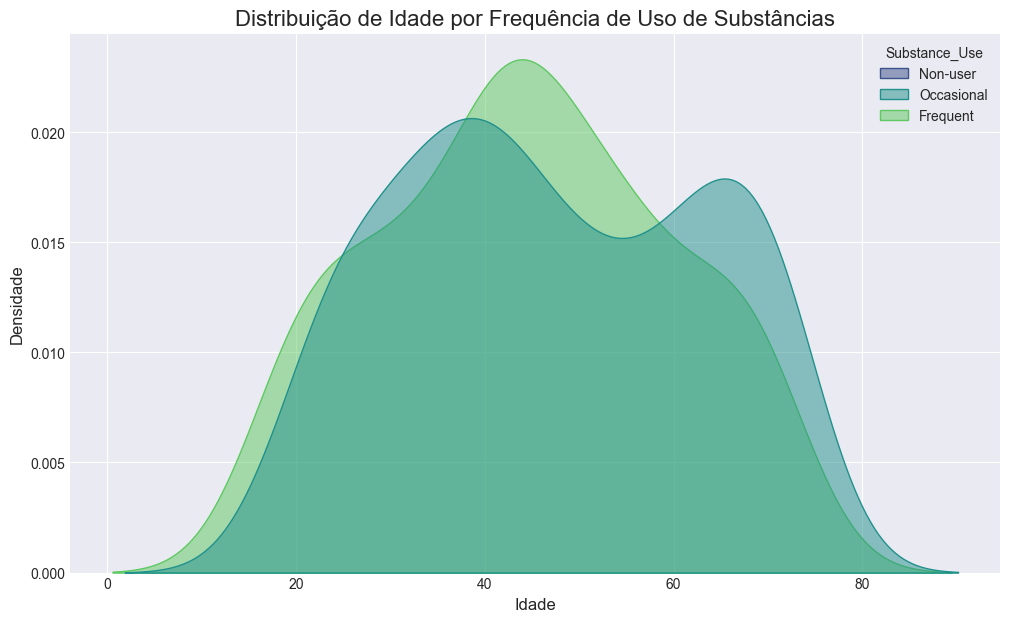

In [ ]:
plt.figure(figsize=(12, 7))
sns.kdeplot(
    data=df, 
    x='Idade', 
    hue='Uso de Substâncias', 
    hue_order=category_order_substance,
    fill=True, alpha=0.5, palette='viridis', common_norm=False
)
plt.title('Distribuição de Idade por Frequência de Uso de Substâncias', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.show()

# Análise: Uso de Substâncias vs. Autoestima #

Pontuação Média de Autoestima por Uso de Substâncias:
Uso de Substâncias
Non-user       NaN
Occasional    4.99
Frequent      5.62
Name: Pontuação de Autoestima, dtype: float64


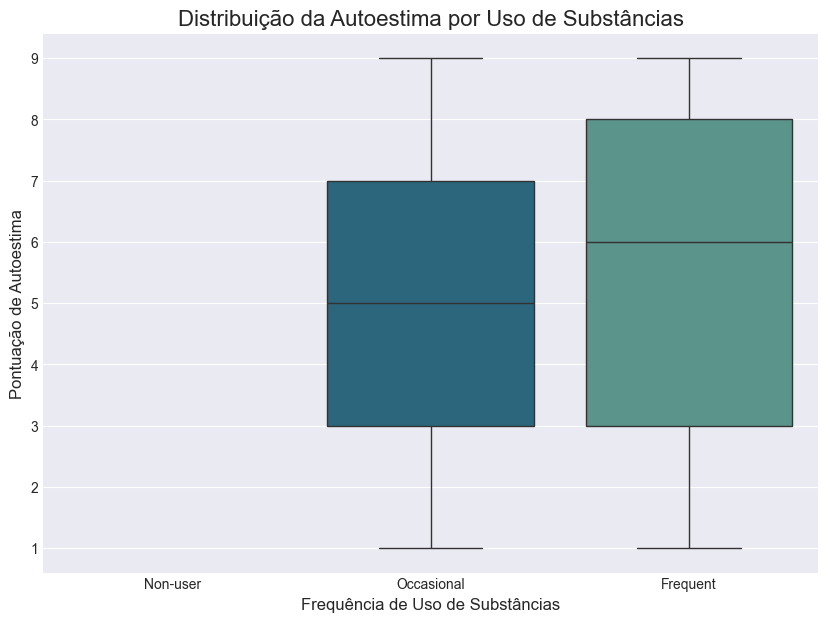

In [37]:
mean_selfesteem_substance = df.groupby('Uso de Substâncias')['Pontuação de Autoestima'].mean().round(2).reindex(category_order_substance)
print("Pontuação Média de Autoestima por Uso de Substâncias:")
print(mean_selfesteem_substance)

plt.figure(figsize=(10, 7))
sns.boxplot(x='Uso de Substâncias', y='Pontuação de Autoestima', data=df, order=category_order_substance,
            palette='crest', hue='Uso de Substâncias', legend=False)
plt.title('Distribuição da Autoestima por Uso de Substâncias', fontsize=16)
plt.xlabel('Frequência de Uso de Substâncias', fontsize=12)
plt.ylabel('Pontuação de Autoestima', fontsize=12)
plt.show()

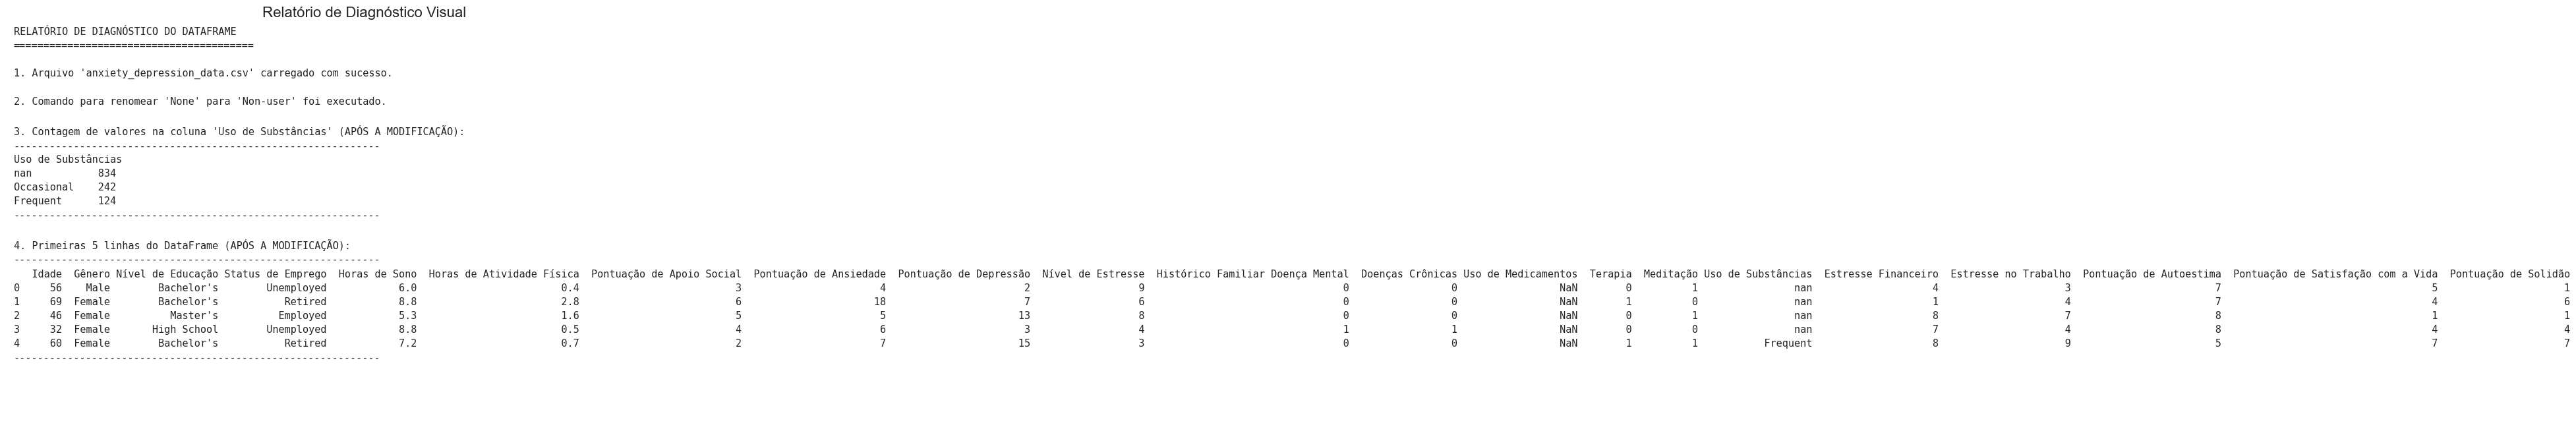

In [38]:
fig, ax = plt.subplots(figsize=(14, 8))
report_text = "RELATÓRIO DE DIAGNÓSTICO DO DATAFRAME\n"
report_text += "="*40 + "\n\n"

try:
    # Carregamos o DataFrame do zero
    df_diag = pd.read_csv('C:/Users/nise_/OneDrive/Documentos/Analise de Dados/saudemental/projeto_saudemental/projeto_saudemental/anxiety_depression_data.csv')
    report_text += "1. Arquivo 'anxiety_depression_data.csv' carregado com sucesso.\n\n"

    # Renomeando as colunas para português do Brasil
    df_diag.rename(columns={
        'Age': 'Idade',
        'Gender': 'Gênero',
        'Education_Level': 'Nível de Educação',
        'Employment_Status': 'Status de Emprego',
        'Sleep_Hours': 'Horas de Sono',
        'Physical_Activity_Hrs': 'Horas de Atividade Física',
        'Social_Support_Score': 'Pontuação de Apoio Social',
        'Anxiety_Score': 'Pontuação de Ansiedade',
        'Depression_Score': 'Pontuação de Depressão',
        'Stress_Level': 'Nível de Estresse',
        'Family_History_Mental_Illness': 'Histórico Familiar Doença Mental',
        'Chronic_Illnesses': 'Doenças Crônicas',
        'Medication_Use': 'Uso de Medicamentos',
        'Therapy': 'Terapia',
        'Meditation': 'Meditação',
        'Substance_Use': 'Uso de Substâncias',
        'Financial_Stress': 'Estresse Financeiro',
        'Work_Stress': 'Estresse no Trabalho',
        'Self_Esteem_Score': 'Pontuação de Autoestima',
        'Life_Satisfaction_Score': 'Pontuação de Satisfação com a Vida',
        'Loneliness_Score': 'Pontuação de Solidão'
    }, inplace=True)

    # limpeza e a substituição
    df_diag['Uso de Substâncias'] = df_diag['Uso de Substâncias'].astype(str).str.strip()
    df_diag['Uso de Substâncias'] = df_diag['Uso de Substâncias'].replace({'None': 'Non-user'})
    report_text += "2. Comando para renomear 'None' para 'Non-user' foi executado.\n\n"

    counts = df_diag['Uso de Substâncias'].value_counts()
    report_text += "3. Contagem de valores na coluna 'Uso de Substâncias' (APÓS A MODIFICAÇÃO):\n"
    report_text += "-------------------------------------------------------------\n"
    report_text += counts.to_string()
    report_text += "\n-------------------------------------------------------------\n\n"

    head_df = df_diag.head()
    report_text += "4. Primeiras 5 linhas do DataFrame (APÓS A MODIFICAÇÃO):\n"
    report_text += "-------------------------------------------------------------\n"
    report_text += head_df.to_string()
    report_text += "\n-------------------------------------------------------------\n"

except Exception as e:
    report_text = f"Ocorreu um erro durante o diagnóstico: {str(e)}"

ax.text(0.01, 0.99, report_text, transform=ax.transAxes, fontsize=11,
    verticalalignment='top', fontfamily='monospace', linespacing=1.5)

ax.axis('off')
plt.title("Relatório de Diagnóstico Visual", fontsize=16)
plt.show()